# Logistic Regression from scratch

## Importing dataset

In [284]:
from subprocess import check_output
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from math import ceil

import matplotlib.pyplot as plt
import seaborn as sb
sns.set_style(style="white")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split
from pandas.tools.plotting import parallel_coordinates
from scipy import optimize as op

In [249]:
# change default matplotlib plot colors
CB91_Blue = '#2CBDFE'
CB91_Green = '#1B8667'
CB91_Yellow = '#CBD46F'
CB91_Orange = '#FCCA60'
CB91_Magenta = '#C84564'
    
color_list = [CB91_Blue, CB91_Green, CB91_Yellow, CB91_Orange,
              CB91_Magenta]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [250]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Visualizations

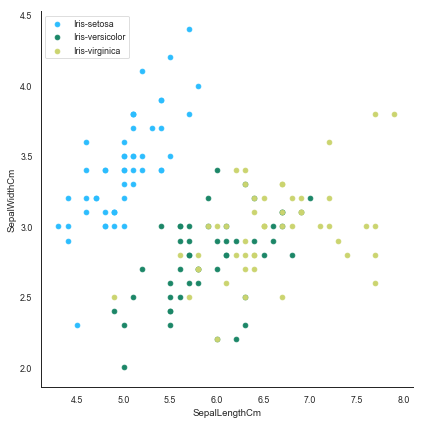

In [275]:
# plot w.r.t sepal length
sepalPlt = sb.FacetGrid(df,hue="Species",size=6).map(plt.scatter,"SepalLengthCm","SepalWidthCm")
plt.legend(loc='upper left');

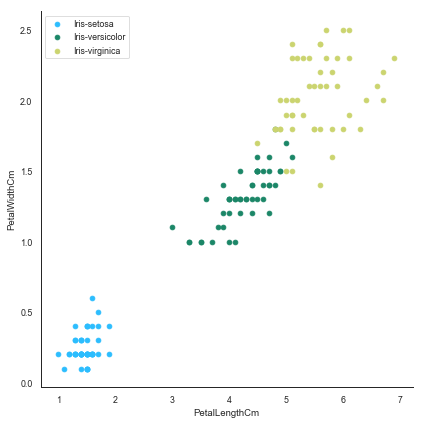

In [274]:
# plot w.r.t petal length
petalPlt = sb.FacetGrid(df, hue="Species", size=6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm")
plt.legend(loc='upper left');

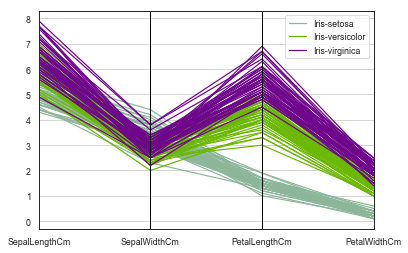

In [276]:
# sepal and petal lengths
parallel_coordinates(df.drop("Id", axis=1), "Species");

In [278]:
# data setup
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

m = df.shape[0] # num examples
n = 4           # num features
k = 3           # num classes

X = np.ones((m, n + 1))
y = np.array((m,1))
X[:,1] = df['PetalLengthCm'].values
X[:,2] = df['PetalWidthCm'].values
X[:,3] = df['SepalLengthCm'].values
X[:,4] = df['SepalWidthCm'].values

y = df['Species'].values # labels

# mean normalization
for j in range(n):
    X[:,j] = (X[:,j] - X[:,j].mean())
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

#### Regularized Cost function and its gradient

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( -y^{(i)} \log(h_{\theta}x^{(i)}) - (1-y^{(i)}) \log(1-h_{\theta}x^{(i)}) \right) + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}x^{(i)} - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \quad \text{for } j \geq 1 $$

In [279]:
# logistic regression

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

# regularized cost function
def regCostFunction(theta, X, y, _lambda = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)

    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg

# regularized gradient function
def regGradient(theta, X, y, _lambda = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m

    return ((1 / m) * X.T.dot(h - y)) + reg

# optimal theta 
def logisticRegression(X, y, theta):
    result = op.minimize(fun = regCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = regGradient)
    
    return result.x

In [280]:
# training
all_theta = np.zeros((k, n + 1))

# one vs. all
i = 0
for flower in Species:
    # set labels in 0 and 1
    tmp_y = np.array(y_train == flower, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n+1,1)))
    all_theta[i] = optTheta
    i += 1

In [282]:
# predictions
P = sigmoid(X_test.dot(all_theta.T)) # probability for each flower
p = [Species[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

print('Test accuracy:', accuracy_score(y_test, p)*100, '%')

Test accuracy: 96.66666666666667 %


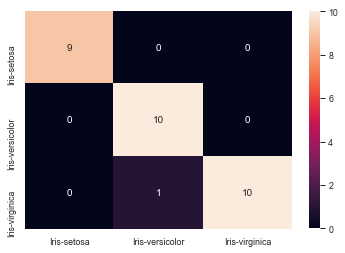

In [283]:
# confusion matrix
cfm = confusion_matrix(y_test, p, labels = Species)
sb.heatmap(cfm, annot = True, xticklabels = Species, yticklabels = Species);